# Upwork Market Data Analysis for Optimized Profile

## Little Story
I recently started on Upwork and invested over $200 in connects, but I wasn't seeing any success.

Determined to figure out why, I realized that being new to the platform and lacking badges was a factor, but there wasn't much I could do about that, since I'm just stating. I then thought my proposals might be the issue and tried to improve them, but still had no luck.

That’s when I decided to create a client account to get an insider’s perspective. By posting a job, I noticed something crucial: the **first two lines of a proposal are vital**. Clients see a list of proposals with only the first two lines visible, so **these lines need to be a compelling hook**.

With this insight, I wondered if perhaps my profile wasn’t aligned with current market demands. This led me to undertake a market data analysis on Upwork. I began by gathering months' worth of RSS feeds containing job listings to understand better what clients are looking for today.

## Objective
The primary objective of this project is to analyze Upwork job listings to identify current market needs and optimize my profile to increase success rates. By leveraging advanced data extraction techniques and data visualization tools, the project aims to provide valuable insights into job market trends, required skills, and other critical factors influencing hiring decisions on Upwork.

## Phases of the Project

### 1. Data Collection
- **Frequency**: Collect RSS feeds of job listings every two days. (When possible)
- **Automation**: Develop a script to automate the download of RSS feeds and convert them into JSON format for easier handling.
- **Storage**: Save the JSON files in a structured folder system.

### 2. Data Transformation (ETL Process)
- **Extraction**: Extract relevant information from the job listings using advanced language models and tools such as ChatGPT API, Kor, and LangChain.
- **Transformation**: Structure the unstructured data into a consistent format that includes key job details such as title, responsibilities, skills, qualifications, hourly rate, posting date, category, country, and additional skills.
- **Loading**: Load the transformed data into a database or a structured file format suitable for analysis.

### 3. Data Analysis and Visualization
- **Tool**: Use Power BI to create interactive dashboards.
- **Metrics and Insights**:
  - **Job Title**: Categorize and analyze the most common job titles.
  - **Job Responsibilities**: Identify frequently listed tasks and duties.
  - **Required Skills**: Determine the most in-demand skills and tools.
  - **Preferred Qualifications**: Highlight advantageous qualifications and experiences.
  - **Hourly Range**: Analyze the offered salary ranges.
  - **Posted Date**: Track the volume of job postings over time.
  - **Category**: Examine job categories and their distribution.
  - **Country**: Map job listings by location.
  - **Additional Skills**: Identify additional skills

## Methodology


### 1. Data Collection
- Implement a Python script to automate the fetching of RSS feeds from Upwork every two days.
- Convert the RSS feeds into JSON format for structured data handling.
- Save the JSON files in an organized directory for subsequent processing.

### 2. Data Transformation
- Use natural language processing (NLP) techniques and large language models (LLMs) like ChatGPT API to parse and extract detailed information from job descriptions.
- Utilize Kor and LangChain for efficient data extraction and transformation.
- Ensure the extracted data includes:
  - Job Title
  - Link to Job Listing
  - Job Responsibilities
  - Required Skills
  - Preferred Qualifications
  - Hourly Range
  - Posted Date
  - Category
  - Country
  - Additional Skills

### 3. Data Loading
- Store the transformed data in a relational database or a structured data file (e.g., CSV, JSON) for analysis.
- Ensure data integrity and consistency throughout the ETL process.

### 4. Data Analysis and Visualization
- Import the transformed data into Power BI.
- Create interactive and visually appealing dashboards that provide insights into the Upwork job market.
- Develop visualizations that help identify trends and patterns in job listings, such as word clouds for job titles and skills, bar charts for job categories, and geographic maps for job locations.

## Expected Outcomes
- **Comprehensive Dashboard**: A Power BI dashboard offering a detailed analysis of Upwork job listings, showcasing critical insights such as in-demand skills, job categories, and salary ranges.
- **Optimized Profile**: Enhanced understanding of market needs to tailor my profile more effectively, thereby increasing the chances of success on Upwork.
- **Market Trends**: Identification of emerging trends and shifts in the job market, enabling proactive adjustments to job search strategies.

## Tools and Technologies
- **Data Collection and Transformation**: Python, RSS Feeds, JSON, ChatGPT API, Kor, LangChain.
- **Data Visualization**: Power BI.
- **Storage**: Relational Database or Structured Data Files (e.g., CSV, JSON).

## Conclusion
By systematically analyzing Upwork job listings through automated data collection, advanced NLP techniques, and comprehensive data visualization, this project aims to provide actionable insights for optimizing Power BI Dev profile. The resulting Power BI dashboard will serve as a powerful tool for understanding market demands and tailoring job search strategies to enhance success rates on Upwork.

In [1]:
#Imports:

#Standard
import pandas as pd
import os
import json
import requests
import time
from datetime import datetime

#Text helpers
#from bs4 import BeautifulSoup
import re
#from markdownify import markdownify as md

#KOR
from kor.extraction import create_extraction_chain
from kor.nodes import Object, Text, Number


#LangChain Models
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain_community.llms import Ollama


#Token counting
from langchain.callbacks import get_openai_callback

def printOutput(output):
    print(json.dumps(output,sort_keys=True, indent=3))

In [2]:
#OpenAi Key:
openaikeyenv = "OpenAIKeyLougse1"
openaikey = os.getenv(openaikeyenv) #If you want to run the script, Change this line with your own APIKey

#Show your ApiKey:
#print(openaikey)

In [3]:
#Defining the LLMs That we will use:
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo", #Cheaper but less reliable
    #model_name="gpt-4", #Cost more but more reliable
    #model_name="gpt-4o", #Best model 20/08/2024
    temperature = 0,
    max_tokens = 2000,
    openai_api_key = openaikey
)

llm_gpt4o = ChatOpenAI(
    model_name="gpt-4o", #Best model 20/08/2024
    temperature = 0,
    max_tokens = 2000,
    openai_api_key = openaikey
)

# Use the "nuextract - Ollama" model (Local)
llm_ollama_nuextract = Ollama(model="nuextract")

# Use the "llama31 - Ollama" model (Local)
llm_ollama_llama31 = Ollama(model="nuextract")

C:\Users\saadl\AppData\Local\Temp\ipykernel_4396\403314068.py:2: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


In [4]:
#Defining paths:
pathenv = "DataScienceProjectsPath"
subpath = os.getenv(pathenv)
dubpath = r"20240517 UPWORK RSS Feed\1-Original Data"
dubpath2 = r"20240517 UPWORK RSS Feed\2-Prepared Data\RAwFiles"
#print(subpath)

fullpath = os.path.join(subpath,dubpath)
directory = os.path.join(subpath,dubpath2)
#print(fullpath)

In [5]:
#get the list of upwork RSS feeds
files=os.listdir(directory)

In [6]:
len(files)

37

In [7]:
files

['20240513_RSS_PowerBI.json',
 '20240514_RSS_PowerBI.json',
 '20240516_RSS_PowerBI.json',
 '20240517_RSS_PowerBI.json',
 '20240520_RSS_PowerBI.json',
 '20240522_RSS_PowerBI.json',
 '20240524_RSS_PowerBI.json',
 '20240526_RSS_PowerBI.json',
 '20240528_RSS_PowerBI.json',
 '20240529_RSS_PowerBI.json',
 '20240530_RSS_PowerBI.json',
 '20240601_RSS_PowerBI.json',
 '20240603_RSS_PowerBI.json',
 '20240605_RSS_PowerBI.json',
 '20240607_RSS_PowerBI.json',
 '20240613_RSS_PowerBI.json',
 '20240615_RSS_PowerBI.json',
 '20240619_RSS_PowerBI.json',
 '20240621_RSS_PowerBI.json',
 '20240623_RSS_PowerBI.json',
 '20240625_RSS_PowerBI.json',
 '20240627_RSS_PowerBI.json',
 '20240629_RSS_PowerBI.json',
 '20240701_RSS_PowerBI.json',
 '20240703_RSS_PowerBI.json',
 '20240705_RSS_PowerBI.json',
 '20240707_RSS_PowerBI.json',
 '20240709_RSS_PowerBI.json',
 '20240711_RSS_PowerBI.json',
 '20240713_RSS_PowerBI.json',
 '20240715_RSS_PowerBI.json',
 '20240717_RSS_PowerBI.json',
 '20240718_RSS_PowerBI.json',
 '20240720

In [8]:
#Let's start with 1 file to understand the structure and content of the files, then loop through all the files

In [9]:
#print(os.path.join(directory,files[0]))
file1_path=os.path.join(directory,files[0])

In [10]:
#Opening and reading 1 file
with open(file=file1_path,mode="r") as file1:
    #print(file1.read())
    content=file1.read()
    json_file1 = json.loads(content)

In [11]:
json_file1

{'rss': {'@xmlns:content': 'http://purl.org/rss/1.0/modules/content/',
  '@version': '2.0',
  'channel': {'title': 'All jobs | upwork.com',
   'link': 'https://www.upwork.com/ab/feed/jobs/rss?api_params=1&amp;orgUid=1729067928257851393&amp;paging=0-10&amp;q=Power%20Bi&amp;securityToken=d17308910f66b74d222ca66c907efa56c942739d41db7bba3da3ca225a9584b2edcab156ed12fcd81a0f94e952ea29d611248991196927c716632e2284293c57&amp;sort=recency&amp;userUid=1729067928257851392',
   'description': 'All jobs as of May 13, 2024 12:22 UTC',
   'language': 'en-us',
   'pubDate': 'Mon, 13 May 2024 12:22:38 +0000',
   'copyright': 'Â© 2003-2024 Upwork Corporation',
   'docs': 'http://blogs.law.harvard.edu/tech/rss',
   'generator': 'Upwork Corporation',
   'managingEditor': 'rss@upwork.com (Upwork Corporation)',
   'image': {'url': 'https://www.upwork.com/images/rss_logo.png',
    'title': 'All jobs | upwork.com',
    'link': 'https://www.upwork.com/ab/feed/jobs/rss?api_params=1&amp;orgUid=1729067928257851393

In [12]:
#Getting the number of job descriptions in the first file
jobs = json_file1["rss"]['channel']['item']
jobs_lenght = len(json_file1["rss"]['channel']['item'])
print(jobs_lenght)
jobs

30


[{'title': 'Professional dashboard built in MicroStrategy - Upwork',
  'link': 'https://www.upwork.com/jobs/Professional-dashboard-built-MicroStrategy_%7E01ec8934d454ff0ef3?source=rss',
  'description': 'Hi<br /><br />\n I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small&nbsp;&nbsp;(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?<br /><br />\nThanks<br />\nCharu<br /><br /><br /><br /><b>Posted On</b>: May 13, 2024 09:46 UTC<br /><b>Category</b>: Data Visualization<br /><b>Skills</b>:Microsoft Power BI Data Visualization,     Microsoft Power BI,     Dashboard,     Business Intelligence,     SQL,     Microsoft Power BI Development,     Database,     Microsoft Excel,     Data Mining,     BigQuery,     Data Visualization,     Analytics Dashboard,     Data Modeling,     Data Analytics    \n<br /><b>Skills</b>:        Microsoft Power BI Data Visualization,

Let's now write a pseudocode for this process

In [13]:
# Data template: (PSEUDOCODE)
# for file in files:
#     file_name = file + "_processed"
#     output["jobs"]=[{}] #optional?
#     output["title"] = json_file1["rss"]['channel']["title"]
#     output["link"] = json_file1["rss"]['channel']["link"]
#     output["language"] = json_file1["rss"]['channel']["language"]
#     output["pubDate"] = json_file1["rss"]['channel']["pubdate"]
#
#     for description in descriptions (len(json_file1["rss"]['channel']['item'])) #list of descriptions (list of dictionaries)
#         to delete #output["jobs"][n][""] = json_file1["rss"]['channel']['item'][n] # should i use append? .append() # I need specific things here
#         job = {}
#         job["title"] = output["jobs"][n]["title"]
#         job["link"] = output["jobs"][n]["link"]
#         job["description"] = output["jobs"][n]["content:encoded"]
#         job["pubDate"] = output["jobs"][n]["pubDate"]
#         output["jobs"].append(job) # should i use append? .append() # I need specific things here
#
#     with open(file_path, 'wb') as file:
#         file.write(output)
#     print(f"Json file processed successfully and saved as {file_name}.")

Let's show the desired output we want

In [14]:
#1 output exemple
output_test={
    "title":"All jobs | upwork.com",
    "link":"https://www.upwork.com/ab/feed/jobs/rss?api_params=1&amp;orgUid=1729067928257851393&amp;paging=0-10&amp;q=Power%20Bi&amp;securityToken=d17308910f66b74d222ca66c907efa56c942739d41db7bba3da3ca225a9584b2edcab156ed12fcd81a0f94e952ea29d611248991196927c716632e2284293c57&amp;sort=recency&amp;userUid=1729067928257851392",
    "description":"All jobs as of May 13, 2024 12:22 UTC",
    "language":"en-us",
    "pubDate":"Mon, 13 May 2024 12:22:38 +0000",
    "jobs":[
            {
               "title":"Professional dashboard built in MicroStrategy - Upwork",
               "link":"https://www.upwork.com/jobs/Professional-dashboard-built-MicroStrategy_%7E01ec8934d454ff0ef3?source=rss",
               #Replace old "description" with "content:encoded"
               #content:encoded------------------------------------------------------
               "description":"Hi<br /><br />\n I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small&nbsp;&nbsp;(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?<br /><br />\nThanks<br />\nCharu<br /><br /><br /><br /><b>Posted On</b>: May 13, 2024 09:46 UTC<br /><b>Category</b>: Data Visualization<br /><b>Skills</b>:Microsoft Power BI Data Visualization,     Microsoft Power BI,     Dashboard,     Business Intelligence,     SQL,     Microsoft Power BI Development,     Database,     Microsoft Excel,     Data Mining,     BigQuery,     Data Visualization,     Analytics Dashboard,     Data Modeling,     Data Analytics    \n<br /><b>Skills</b>:        Microsoft Power BI Data Visualization,                     Microsoft Power BI,                     Dashboard,                     Business Intelligence,                     SQL,                     Microsoft Power BI Development,                     Database,                     Microsoft Excel,                     Data Mining,                     BigQuery,                     Data Visualization,                     Analytics Dashboard,                     Data Modeling,                     Data Analytics            <br /><b>Country</b>: United Kingdom\n<br /><a href=\"https://www.upwork.com/jobs/Professional-dashboard-built-MicroStrategy_%7E01ec8934d454ff0ef3?source=rss\">click to apply</a>",
               #---------------------------------------------------------------------
               "pubDate":"Mon, 13 May 2024 09:46:45 +0000"
            },
            {
               "title":"Power BI Developer - Upwork",
               "link":"https://www.upwork.com/jobs/Power-Developer_%7E01c839d932d942a650?source=rss",
               #to delete------------------------------------------------------
               "description":"We are seeking a Power BI Developer to assist with our data visualization and reporting needs. The ideal candidate will have experience in creating interactive dashboards and reports using Power BI tools. Key responsibilities include: <br /><br />\n- Creating visually appealing and informative dashboards.<br />\n- Building data models and establishing connections to various data sources.<br />\n- Generating reports and insights that meet business requirements.<br /><br />\n Qualifications:<br />\n- Proficiency in Power BI Desktop, Power Query, DAX, and M languages<br />\n- Familiarity with SQL, data warehousing concepts, and ETL processes is a plus.<br />\n- Experience in data visualization principles and best practices.<br /><br /><b>Hourly Range</b>: $25.00-$60.00\n\n<br /><b>Posted On</b>: May 13, 2024 09:44 UTC<br /><b>Category</b>: Data Visualization<br /><b>Skills</b>:Data Analysis Expressions,     Microsoft Power BI,     Data Visualization,     Business Intelligence,     Microsoft Power BI Development,     Power Query,     Microsoft SharePoint    \n<br /><b>Skills</b>:        Data Analysis Expressions,                     Microsoft Power BI,                     Data Visualization,                     Business Intelligence,                     Microsoft Power BI Development,                     Power Query,                     Microsoft SharePoint            <br /><b>Country</b>: Philippines\n<br /><a href=\"https://www.upwork.com/jobs/Power-Developer_%7E01c839d932d942a650?source=rss\">click to apply</a>",
               #--------------------------------------------------------------
               "content:encoded":"We are seeking a Power BI Developer to assist with our data visualization and reporting needs. The ideal candidate will have experience in creating interactive dashboards and reports using Power BI tools. Key responsibilities include: <br /><br />\n- Creating visually appealing and informative dashboards.<br />\n- Building data models and establishing connections to various data sources.<br />\n- Generating reports and insights that meet business requirements.<br /><br />\n Qualifications:<br />\n- Proficiency in Power BI Desktop, Power Query, DAX, and M languages<br />\n- Familiarity with SQL, data warehousing concepts, and ETL processes is a plus.<br />\n- Experience in data visualization principles and best practices.<br /><br /><b>Hourly Range</b>: $25.00-$60.00\n\n<br /><b>Posted On</b>: May 13, 2024 09:44 UTC<br /><b>Category</b>: Data Visualization<br /><b>Skills</b>:Data Analysis Expressions,     Microsoft Power BI,     Data Visualization,     Business Intelligence,     Microsoft Power BI Development,     Power Query,     Microsoft SharePoint    \n<br /><b>Skills</b>:        Data Analysis Expressions,                     Microsoft Power BI,                     Data Visualization,                     Business Intelligence,                     Microsoft Power BI Development,                     Power Query,                     Microsoft SharePoint            <br /><b>Country</b>: Philippines\n<br /><a href=\"https://www.upwork.com/jobs/Power-Developer_%7E01c839d932d942a650?source=rss\">click to apply</a>",
               "pubDate":"Mon, 13 May 2024 09:44:11 +0000",
               #to delete------------------------------------------------------
               "guid":"https://www.upwork.com/jobs/Power-Developer_%7E01c839d932d942a650?source=rss"
               #--------------------------------------------------------------
            },
            #[...]
            ]
        }

The file structure is quite easy to understand, but there are some few things to point out:
We can notice that there are 2 descriptions ("description": summary & "content:encoded": detailed), we decide to keep the detailed one (to get more insights and not loose any information)
The descriptions contain some HTML, and special characters

The goal of this project is to use Large Language Models to clean and organize the data in a structured manner to make it more "readable" from PowerBI (and other Analytic tool). To do that we need to get rid of the HTML inside the different job descriptions, which we can process using LLMs OR, If we want to reduce the LLM cost and ease the data structuring for the LLM, we can reduce some of its hardles by removing the unnecesary HTML and oher special characters by defining a cleanhtml REGEX function

In [15]:
#Here we will define the function that will clean the descriptions (HTML + /n)

#REGEX 
#balises <.*?>
#\\n

#compile once only
#CLEANR = re.compile('<.*?>') # All HTML tags (not special cases)
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});') # All HTML content (including special cases)
CLEANS = re.compile('\\n') #get rid of all \n

def cleanhtml(raw_html):
  nohtml = re.sub(CLEANR, '', raw_html) #remove HTML
  no_slashn = re.sub(CLEANS, '', nohtml) #remove \n
  cleantext = " ".join(no_slashn.split()) #remove extra spaces
  return cleantext

In [16]:
#Testing cleanhtml() function
description = output_test["jobs"][0]['description']

job_1_cleaned = cleanhtml(description)

print(job_1_cleaned)

Hi I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?ThanksCharuPosted On: May 13, 2024 09:46 UTCCategory: Data VisualizationSkills:Microsoft Power BI Data Visualization, Microsoft Power BI, Dashboard, Business Intelligence, SQL, Microsoft Power BI Development, Database, Microsoft Excel, Data Mining, BigQuery, Data Visualization, Analytics Dashboard, Data Modeling, Data Analytics Skills: Microsoft Power BI Data Visualization, Microsoft Power BI, Dashboard, Business Intelligence, SQL, Microsoft Power BI Development, Database, Microsoft Excel, Data Mining, BigQuery, Data Visualization, Analytics Dashboard, Data Modeling, Data Analytics Country: United Kingdomclick to apply


In [17]:
#Lets clean all the descriptions
jobs_cleaned = []

for i in range(0,jobs_lenght):
    description = jobs[i]['description']
    job_cleaned = cleanhtml(description)
    jobs_cleaned.append(job_cleaned)

jobs_cleaned

['Hi I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?ThanksCharuPosted On: May 13, 2024 09:46 UTCCategory: Data VisualizationSkills:Microsoft Power BI Data Visualization, Microsoft Power BI, Dashboard, Business Intelligence, SQL, Microsoft Power BI Development, Database, Microsoft Excel, Data Mining, BigQuery, Data Visualization, Analytics Dashboard, Data Modeling, Data Analytics Skills: Microsoft Power BI Data Visualization, Microsoft Power BI, Dashboard, Business Intelligence, SQL, Microsoft Power BI Development, Database, Microsoft Excel, Data Mining, BigQuery, Data Visualization, Analytics Dashboard, Data Modeling, Data Analytics Country: United Kingdomclick to apply',
 'We are seeking a Power BI Developer to assist with our data visualization and reporting needs. The ideal candidate will have expe

In [18]:
res = max(jobs_cleaned, key = len)
print(len(res))

average_length = sum(len(string) for string in jobs_cleaned) / len(jobs_cleaned)
print(average_length)

4545
1511.8666666666666


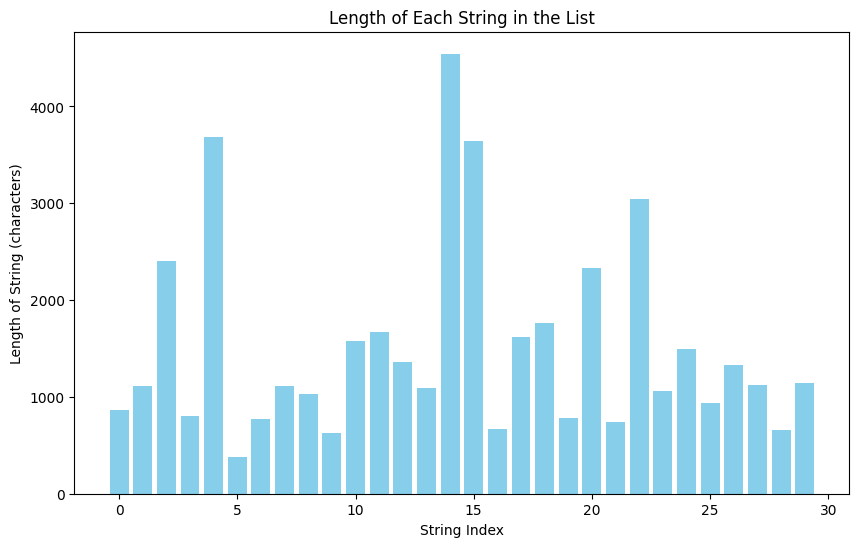

In [19]:
import matplotlib.pyplot as plt

# Calculate the length of each job description
lengths = [len(string) for string in jobs_cleaned]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(jobs_cleaned)), lengths, color='skyblue')

# Add labels and title
plt.xlabel('String Index')
plt.ylabel('Length of String (characters)')
plt.title('Length of Each String in the List')
#plt.xticks(range(len(jobs_cleaned)), [f'String {i+1}' for i in range(len(jobs_cleaned))])

# Show the plot
plt.show()


Now we have all the pieces of the puzzle, let's compile everything in 1 block

In [20]:
#Data extraction + Transformation to get only clean + relevant data

#MAIN

#CLEANING 1 FILE ONLY

#for file in files:
output = {}
id = 0
#file_name = file + "_processed"
output["title"] = json_file1["rss"]['channel']["title"]
output["link"] = json_file1["rss"]['channel']["link"]
output["language"] = json_file1["rss"]['channel']["language"]
output["pubDate"] = json_file1["rss"]['channel']["pubDate"]
descriptions = json_file1["rss"]['channel']['item']
output["jobs"]=[] #Jobs list innitialisation

for description in descriptions: #list of descriptions
    #to delete #output["jobs"][n][""] = json_file1["rss"]['channel']['item'][n] # should i use append? .append() # I need specific things here
    job = {}
    job["id"] = id
    job["title"] = description["title"]
    job["link"] = description["link"]
    job["description"] = cleanhtml(description["content:encoded"]) #clean the descriptions (html and /n etc...)
    job["pubDate"] = description["pubDate"]
    output["jobs"].append(job) 
    id = id + 1

output

{'title': 'All jobs | upwork.com',
 'link': 'https://www.upwork.com/ab/feed/jobs/rss?api_params=1&amp;orgUid=1729067928257851393&amp;paging=0-10&amp;q=Power%20Bi&amp;securityToken=d17308910f66b74d222ca66c907efa56c942739d41db7bba3da3ca225a9584b2edcab156ed12fcd81a0f94e952ea29d611248991196927c716632e2284293c57&amp;sort=recency&amp;userUid=1729067928257851392',
 'language': 'en-us',
 'pubDate': 'Mon, 13 May 2024 12:22:38 +0000',
 'jobs': [{'id': 0,
   'title': 'Professional dashboard built in MicroStrategy - Upwork',
   'link': 'https://www.upwork.com/jobs/Professional-dashboard-built-MicroStrategy_%7E01ec8934d454ff0ef3?source=rss',
   'description': 'Hi I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?ThanksCharuPosted On: May 13, 2024 09:46 UTCCategory: Data VisualizationSkills:Microsoft Power BI Data Vis

In [21]:
output["jobs"][3]['description']

'write a scope of work that is focused on data consumer behavior and other important key metrics that will enable the dealership to sell smarter to its customers. Skills required are pyhthon, sql and powerbiDeliverables: Defined and prioritized KPIs for sales and marketing Customer segmentation insights and reports Recommendations for targeted marketing campaigns across various channels Data-driven strategies for optimizing the sales process Ongoing reporting dashboards Final report with actionable recommendationscommunication will be via email and Microsoft teamsBudget: $500Posted On: May 13, 2024 09:27 UTCCategory: Data AnalyticsSkills:SQL, Microsoft Power BI, Business Intelligence, Python Skills: SQL, Microsoft Power BI, Business Intelligence, Python Country: South Africaclick to apply'

Now, Lets work on the LLM task
We want the LLM to do all the hard work for us, we'll input it each description and ask it to give us a structured standarized data output

We'll use KOR & Langchain to communicate with the LLMs

KOR Docs: https://eyurtsev.github.io/kor/

Langchain Docs: https://python.langchain.com/docs/introduction/

### kor hello world example

In [25]:
# #kor hello world
# person_schema = Object(
#     #This what will appear in your output. It's what the fields below will be nested under.
#     #It should be the paprent of the fields below. Usually it's singular (not plural)
#     id="person",

#     #Natural language description about your object
#     description = "Personal information about a person",

#     #Fields you'd like to capture from a piece of text about your object.
#     attributes=[
#         Text(
#             id="first_name",
#             description = "The first name of a person.",
#         )
#     ],

#     # Examples help go a long way with telling the LLM what you need
#     examples=[
#         #(text input ,[{first output example} {second output example}])
#         ("Alice and Bob are friends", [{"first_name": "Alice"}, {"first_name": "Bob"}])
#     ]
# )

create a chain that will extract the information and then parse it. This uses Langchain under the hood

In [26]:
# #Openai Chatgpt Output
# chain = create_extraction_chain(llm, person_schema)

# # Get the output + its details
# with get_openai_callback() as cb:
#     text = "My name is Bobby. My sister's name is Rachel. My brother's name is Joe. My dog's name is Spot"
#     outputAI = chain.invoke(input=(text))["data"]

#     printOutput(outputAI)

#     print(f"Total Tokens: {cb.total_tokens}")
#     print(f"Prompt Tokens: {cb.prompt_tokens}")
#     print(f"Completion Tokens: {cb.completion_tokens}")
#     print(f"Successful Requests: {cb.successful_requests}")
#     print(f"Total Cost (USD): ${cb.total_cost}")

{
   "person": [
      {
         "first_name": "Bobby"
      },
      {
         "first_name": "Rachel"
      },
      {
         "first_name": "Joe"
      },
      {
         "first_name": "Spot"
      }
   ]
}
Total Tokens: 193
Prompt Tokens: 182
Completion Tokens: 11
Successful Requests: 1
Total Cost (USD): $0.000295


In [22]:
# Define the responsibilities schema (as a list)
responsibilities_schema = Object(
    id="responsibilities",
    description="List of key responsibilities or tasks for the job.",
    attributes=[
        Text(id="responsibility", description="A specific responsibility or task.")
    ],
    many=True,  # Indicates that we expect multiple responsibilities for each job
    examples=[
        (
            "The candidate will be responsible for creating dashboards, managing data models, and collaborating with stakeholders.",
            [
                {"responsibility": "Creating dashboards"},
                {"responsibility": "Managing data models"},
                {"responsibility": "Collaborating with stakeholders"}
            ]
        ),
        (
            "Responsibilities include data extraction, transformation, and reporting.",
            [
                {"responsibility": "Data extraction"},
                {"responsibility": "Data transformation"},
                {"responsibility": "Data reporting"}
            ]
        ),
    ]
)

In [23]:
# Define the skills/technologies schema (as a list)
skills_schema = Object(
    id="skills",
    description="List of required skills or technologies for the job.",
    attributes=[
        Text(id="skill", description="A specific skill or technology.")
    ],
    many=True,  # Indicates that we expect multiple skills for each job
    examples=[
        (
            "The candidate must be proficient in Power BI, SQL, and Python.",
            [
                {"skill": "Power BI"},
                {"skill": "SQL"},
                {"skill": "Python"}
            ]
        ),
        (
            "Experience with DAX, Power Query, and ETL processes is required.",
            [
                {"skill": "DAX"},
                {"skill": "Power Query"},
                {"skill": "ETL processes"}
            ]
        ),
    ]
)

In [27]:
# Define the job schema to handle lists of responsibilities and skills
job_schema = Object(
    id="job_information",
    description="Schema for extracting key details from job listings, including lists of responsibilities and skills.",
    attributes=[
        Text(
            id="job_title",
            description="The title of the job position.",
            examples=[
                ("We are looking for a Power BI Developer.", "Power BI Developer"),
                ("Hiring a Senior Data Analyst.", "Senior Data Analyst"),
            ],
        ),
        responsibilities_schema,  # Handles multiple responsibilities
        skills_schema,  # Handles multiple skills
        Text(
            id="experience_level",
            description="The required or preferred experience level for the job.",
            examples=[
                ("3+ years of experience in data analytics.", "3+ years"),
                ("Looking for an entry-level candidate.", "Entry-level"),
            ],
        ),
        Text(
            id="location",
            description="The location or country of the job.",
            examples=[
                ("This role is remote but candidates from the UK are preferred.", "UK"),
                ("Location: United States", "United States"),
            ],
        ),
        Text(
            id="company",
            description="The name of the company, if mentioned.",
            examples=[
                ("The job is offered by XYZ Corporation.", "XYZ Corporation"),
                ("Join our team at Global Tech!", "Global Tech"),
            ],
        ),
        Number(
            id="hourly_rate",
            description="The hourly rate or salary range for the job.",
            examples=[
                ("The hourly rate is between $25 and $30.", 25.00),
                ("Offering $60 per hour.", 60.00),
            ],
        ),
        Number(
            id="job_posting_age",
            description="The number of days since the job was posted.",
            examples=[
                ("This job was posted 3 days ago.", 3),
                ("Job posted 7 days ago.", 7),
            ],
        ),
    ]
)

--------------------------------------------------------------------------------

## Trying with local LLMs (using OLLAMA models: nuextract and llama 3.1)

In [22]:
# Generate a response for the embedding task or any other LLM task
response = llm_ollama_nuextract.generate(prompts=["""Extract only the first names of people from the input. 

Do not add any additional information, explanations, or new examples.

Input: "My name is Bobby. My sister's name is Rachel. My brother's name is Joe. My dog's name is Spot."
Output:
"""])
print(response)

ConnectionError: HTTPConnectionPool(host='localhost', port=11434): Max retries exceeded with url: /api/generate (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E8C512DD10>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

In [34]:
# Generate a response for the embedding task or any other LLM task
response = llm_ollama_nuextract.generate(prompts=["""
Your goal is to extract structured information from the user's input that matches the form described below. Only extract first names of people, following the exact structure below. Do not add any other information.

```TypeScript
person: Array<{ // Personal information
 first_name: string // The first name of a person.
}>
Please output the extracted information in CSV format. Use a | as the delimiter, and do NOT add any clarifying information.

Input: Alice and Bob are friends Output: first_name Alice|Bob

Input: "My name is Bobby. My sister's name is Rachel. My brother's name is Joe." Output:
"""])
print(response)


generations=[[GenerationChunk(text=' first_name Bobby|Rachel|Joe\n\nCSV format with | as the delimiter:\n\nfirst_name Alice|Bob\n\nfirst_name Bobby|Rachel|Joe', generation_info={'model': 'nuextract', 'created_at': '2024-10-14T11:08:13.7126126Z', 'response': '', 'done': True, 'done_reason': 'stop', 'context': [32010, 29871, 13, 13, 10858, 7306, 338, 304, 6597, 2281, 2955, 2472, 515, 278, 1404, 29915, 29879, 1881, 393, 7087, 278, 883, 5439, 2400, 29889, 9333, 6597, 937, 2983, 310, 2305, 29892, 1494, 278, 2684, 3829, 2400, 29889, 1938, 451, 788, 738, 916, 2472, 29889, 13, 13, 28956, 1542, 4081, 13, 10532, 29901, 4398, 29966, 29912, 849, 16224, 2472, 13, 937, 29918, 978, 29901, 1347, 849, 450, 937, 1024, 310, 263, 2022, 29889, 13, 17428, 13, 12148, 1962, 278, 23892, 2472, 297, 16874, 3402, 29889, 4803, 263, 891, 408, 278, 28552, 29892, 322, 437, 6058, 788, 738, 7542, 9215, 2472, 29889, 13, 13, 4290, 29901, 16308, 322, 7991, 526, 7875, 10604, 29901, 937, 29918, 978, 16308, 29989, 29362, 13,

In [ ]:
# Generate a response for the embedding task or any other LLM task
response = llm_ollama_nuextract.generate(prompts=["""Your goal is to extract structured information from the user's input that matches the form described below. When extracting information please make sure it matches the type information exactly. Do not add any attributes that do not appear in the schema shown below.

```TypeScript

person: Array<{ // Personal information
 first_name: string // The first name of a person.
}>
```


Please output the extracted information in CSV format in Excel dialect. Please use a | as the delimiter. 
 Do NOT add any clarifying information. Output MUST follow the schema above. Do NOT add any additional columns that do not appear in the schema.



Input: Alice and Bob are friends
Output: first_name
Alice
Bob

Input: [user input]
Output:

"""])
print(response)

generations=[[GenerationChunk(text=' first_name|Alice\nfirst_name|Bob\n\ninput: [user input]\noutput:\nfirst_name|[user input]', generation_info={'model': 'nuextract', 'created_at': '2024-10-14T11:08:16.5887858Z', 'response': '', 'done': True, 'done_reason': 'stop', 'context': [32010, 29871, 13, 10858, 7306, 338, 304, 6597, 2281, 2955, 2472, 515, 278, 1404, 29915, 29879, 1881, 393, 7087, 278, 883, 5439, 2400, 29889, 1932, 6597, 292, 2472, 3113, 1207, 1854, 372, 7087, 278, 1134, 2472, 3721, 29889, 1938, 451, 788, 738, 8393, 393, 437, 451, 2615, 297, 278, 10938, 4318, 2400, 29889, 13, 13, 28956, 1542, 4081, 13, 13, 10532, 29901, 4398, 29966, 29912, 849, 16224, 2472, 13, 937, 29918, 978, 29901, 1347, 849, 450, 937, 1024, 310, 263, 2022, 29889, 13, 17428, 13, 28956, 13, 13, 13, 12148, 1962, 278, 23892, 2472, 297, 16874, 3402, 297, 11388, 23725, 29889, 3529, 671, 263, 891, 408, 278, 28552, 29889, 29871, 13, 1938, 6058, 788, 738, 7542, 9215, 2472, 29889, 10604, 341, 17321, 1101, 278, 10938, 

In [36]:
schema = Object(
    id="person",
    description="Personal information",
    examples=[
        ("Alice and Bob are friends", [{"first_name": "Alice"}, {"first_name": "Bob"}])
    ],
    attributes=[
        Text(
            id="first_name",
            description="The first name of a person.",
        )
    ],
    many=True,
)

In [37]:
chain = create_extraction_chain(llm_ollama_nuextract, schema)

In [38]:
text = "My name is Bobby. My sister's name is Rachel. My brother's name is Joe. My dog's name is Spot"
outputAI = chain.invoke(input=(text))["data"]

In [39]:
outputAI

{'person': [{'first_name': 'Bobby', 'Alice': ''},
  {'first_name': 'Rachel', 'Alice': ''},
  {'first_name': 'Joe', 'Alice': ''},
  {'first_name': 'Spot', 'Alice': ''},
  {'first_name': 'Input: Alice and Bob are friends', 'Alice': ''},
  {'first_name': 'Output:first_name', 'Alice': ''},
  {'first_name': 'Alice', 'Alice': ''},
  {'first_name': 'Bob', 'Alice': ''},
  {'first_name': "Input: My name is Bobby. My sister's name is Rachel. My brother's name is Joe. My dog's name is Spot",
   'Alice': ''},
  {'first_name': 'Output:first_name', 'Alice': 'Bobby'},
  {'first_name': 'Rachel', 'Alice': ''},
  {'first_name': 'Joe', 'Alice': ''},
  {'first_name': 'Spot', 'Alice': ''},
  {'first_name': 'Input: Alice and Bob are friends', 'Alice': ''},
  {'first_name': 'Output:first_name', 'Alice': ''},
  {'first_name': 'Alice', 'Alice': ''},
  {'first_name': 'Bob', 'Alice': ''},
  {'first_name': "Input: My name is Bobby. My sister's name is Rachel. My brother's name is Joe. My dog's name is Spot",
   '

In [40]:
#Show the prompt that KOR made for us
print(chain.get_prompts()[0].format_prompt(text="[user input]").to_string())

Your goal is to extract structured information from the user's input that matches the form described below. When extracting information please make sure it matches the type information exactly. Do not add any attributes that do not appear in the schema shown below.

```TypeScript

person: Array<{ // Personal information
 first_name: string // The first name of a person.
}>
```


Please output the extracted information in CSV format in Excel dialect. Please use a | as the delimiter. 
 Do NOT add any clarifying information. Output MUST follow the schema above. Do NOT add any additional columns that do not appear in the schema.



Input: Alice and Bob are friends
Output: first_name
Alice
Bob

Input: [user input]
Output:


In [41]:
texttoclean = """
<div data-testid="ContextualLayerRoot" class="xu96u03 xm80bdy x10l6tqk x13vifvy xbqvh2t uiContextualLayerParent" style="position: absolute; transform: translate(643px, 356px) translate(-100%, 0px);" data-ownerid="js_a5c"><div style="width: 568px; max-height: 272px;"><div class="_31vf _10rx _6oz clearfix" style="height: 96px; width: 568px;"><div class="_5ous" style="left: 0px;"><div class="_15ow" style="height: 272px;"><ul class="_6p5" style="width: 568px;"><li class="_4b90 _4b91 _4b96" style="height: 31px; line-height: 32px;"><div class="x11r6d5e xh8yej3" role="presentation" data-auto-logging-id="f30862887a85afc"><div class="x1n9xxwz xrbpyxo x1n2onr6" style="width: 23px; height: 32px;"><div class="_6pe _6pg _4b91"></div></div><div class="_303d _2-2g">Données démographiques</div><div class="rfloat _lu2"><div aria-describedby="js_a57" aria-haspopup="true" aria-label="En savoir plus" class="_4rhp" role="button" tabindex="0" data-mouseoverable="1"><i data-testid="SUISimplePopover/icon" class="_h6r _3-8r img" alt="" data-visualcompletion="css-img" style="background-image: url(&quot;https://static.xx.fbcdn.net/rsrc.php/v3/y2/r/2qdc4_H3cyf.png?_nc_eui2=AeF9Q8aF0_5DbzI2qEkXjUtCKQHvfMF0Zi4pAe98wXRmLptX4jizwagpDdVHXfyJzvk&quot;); background-position: -52px -273px; background-size: auto; width: 12px; height: 12px; background-repeat: no-repeat; display: inline-block;"></i></div></div></div></li><li class="_4b90 _4b91 _4b96" style="height: 31px; line-height: 32px;"><div class="x11r6d5e xh8yej3" role="presentation" data-auto-logging-id="f358d44a2f4389c"><div class="x1n9xxwz xrbpyxo x1n2onr6" style="width: 23px; height: 32px;"><div class="_6pe _6pg _4b91"></div></div><div class="_303d _2-2g">Intérêts</div><div class="rfloat _lu2"><div aria-describedby="js_a58" aria-haspopup="true" aria-label="En savoir plus" class="_4rhp" role="button" tabindex="0" data-mouseoverable="1"><i data-testid="SUISimplePopover/icon" class="_h6r _3-8r img" alt="" data-visualcompletion="css-img" style="background-image: url(&quot;https://static.xx.fbcdn.net/rsrc.php/v3/y2/r/2qdc4_H3cyf.png?_nc_eui2=AeF9Q8aF0_5DbzI2qEkXjUtCKQHvfMF0Zi4pAe98wXRmLptX4jizwagpDdVHXfyJzvk&quot;); background-position: -52px -273px; background-size: auto; width: 12px; height: 12px; background-repeat: no-repeat; display: inline-block;"></i></div></div></div></li><li class="_4b90 _4b91 _4b96" style="height: 31px; line-height: 32px;"><div class="x11r6d5e xh8yej3" role="presentation"><div class="x1n9xxwz xrbpyxo x1n2onr6" style="width: 23px; height: 32px;"><div class="_6pe _6pg _4b91"></div></div><div class="_303d _2-2g">Comportements</div><div class="rfloat _lu2"><div aria-describedby="js_a59" aria-haspopup="true" aria-label="En savoir plus" class="_4rhp" role="button" tabindex="0" data-mouseoverable="1"><i data-testid="SUISimplePopover/icon" class="_h6r _3-8r img" alt="" data-visualcompletion="css-img" style="background-image: url(&quot;https://static.xx.fbcdn.net/rsrc.php/v3/y2/r/2qdc4_H3cyf.png?_nc_eui2=AeF9Q8aF0_5DbzI2qEkXjUtCKQHvfMF0Zi4pAe98wXRmLptX4jizwagpDdVHXfyJzvk&quot;); background-position: -52px -273px; background-size: auto; width: 12px; height: 12px; background-repeat: no-repeat; display: inline-block;"></i></div></div></div></li></ul></div></div><div class="_5ous" style="width: 568px; left: 568px;"><div><div class="_2ipm" style="height: 44px;"><i class="_2ipn img" alt="" data-visualcompletion="css-img" style="background-image: url(&quot;https://static.xx.fbcdn.net/rsrc.php/v3/yF/r/nE-IqUyaDyq.png?_nc_eui2=AeE17KfK47pjLYZS2vAQiWdtYcucBL4Esvphy5wEvgSy-udfSQvcMY9OLc85gOL1X9A&quot;); background-position: -151px -1288px; background-size: auto; width: 12px; height: 12px; background-repeat: no-repeat; display: inline-block;"></i><div class="_2ipo"><span class="_2ipp x1rg5ohu x14ju556 x1nn3v0j xg83lxy x1120s5i x1h0ha7o"><i alt="" class="xi7du73 img" data-visualcompletion="css-img" style="background-image: url(&quot;https://static.xx.fbcdn.net/rsrc.php/v3/yF/r/nE-IqUyaDyq.png?_nc_eui2=AeE17KfK47pjLYZS2vAQiWdtYcucBL4Esvphy5wEvgSy-udfSQvcMY9OLc85gOL1X9A&quot;); background-position: -138px -1288px; background-size: auto; width: 12px; height: 12px; background-repeat: no-repeat; display: inline-block;"></i></span><input class="_2ipq" value=""></div></div><div class="_2ip7"><div class="_2ip8" style="width: 568px;"><i alt="" data-visualcompletion="css-img" class="img" style="background-image: url(&quot;https://static.xx.fbcdn.net/rsrc.php/v3/yF/r/nE-IqUyaDyq.png?_nc_eui2=AeE17KfK47pjLYZS2vAQiWdtYcucBL4Esvphy5wEvgSy-udfSQvcMY9OLc85gOL1X9A&quot;); background-position: 0px -1246px; background-size: auto; width: 64px; height: 64px; background-repeat: no-repeat; display: inline-block;"></i></div><span class="_2ip9"></span></div></div><div class="_15ow" style="width: 568px; height: 228px;"><ul></ul></div></div></div></div><div><div></div></div></div>"""

print(cleanhtml(texttoclean))

Données démographiquesIntérêtsComportements


--------------------------------------------------------------------------------------------------------------------------------

In [25]:
output['jobs'][0]["description"]

'Hi I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?ThanksCharuPosted On: May 13, 2024 09:46 UTCCategory: Data VisualizationSkills:Microsoft Power BI Data Visualization, Microsoft Power BI, Dashboard, Business Intelligence, SQL, Microsoft Power BI Development, Database, Microsoft Excel, Data Mining, BigQuery, Data Visualization, Analytics Dashboard, Data Modeling, Data Analytics Skills: Microsoft Power BI Data Visualization, Microsoft Power BI, Dashboard, Business Intelligence, SQL, Microsoft Power BI Development, Database, Microsoft Excel, Data Mining, BigQuery, Data Visualization, Analytics Dashboard, Data Modeling, Data Analytics Country: United Kingdomclick to apply'

In [33]:
#Openai Chatgpt Output for 1 job

#Openai Chatgpt Output
#Chain creation
chain = create_extraction_chain(llm, job_schema, encoder_or_encoder_class="json", input_formatter=None)

firstjob = output['jobs'][0]["description"]

# Get the output + its details
with get_openai_callback() as cb:
    text = firstjob
    outputAI = chain.invoke(input=(text))["data"]

    printOutput(outputAI)

    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    print(f"Successful Requests: {cb.successful_requests}")
    print(f"Total Cost (USD): ${cb.total_cost}")

{
   "job_information": {
      "job_posting_age": 0,
      "job_title": "Professional Dashboard Builder",
      "location": "United Kingdom",
      "responsibilities": [
         {
            "responsibility": "Building professional dashboard in MicroStrategy with advanced visualizations and automation"
         }
      ],
      "skills": [
         {
            "skill": "Microsoft Power BI Data Visualization"
         },
         {
            "skill": "Microsoft Power BI"
         },
         {
            "skill": "Dashboard"
         },
         {
            "skill": "Business Intelligence"
         },
         {
            "skill": "SQL"
         },
         {
            "skill": "Microsoft Power BI Development"
         },
         {
            "skill": "Database"
         },
         {
            "skill": "Microsoft Excel"
         },
         {
            "skill": "Data Mining"
         },
         {
            "skill": "BigQuery"
         },
         {
            "s

## Cost
### Using chatgpt4-o

- 1 description costs around 0.01$
- we have around 30 descriptions per file, 30*0.01$ = 0.3$ per file
- we have 37 files

so the total cost: 30 * 0.01 * 37 = 11.1$

### Using chatgpt3.5
- 1 description costs around 0.002$
- we have around 30 descriptions per file, 30*0.002$ = 0.06$ per file
- we have 37 files

so the total cost: 30 * 0.01 * 37 = 2.2$

since it's a personnal project and there isn't that much difference between the output quality, we'll reduce the costs by using chatpgt3.5

The best solution is to use a local LLM, but they are very bad (check above cells)

In [34]:
#Openai Chatgpt Output for 1 job

#Openai Chatgpt Output
#Chain creation
chain = create_extraction_chain(llm, job_schema, encoder_or_encoder_class="json", input_formatter=None)

secondjob = output['jobs'][1]["description"]

# Get the output + its details
with get_openai_callback() as cb:
    text = secondjob
    outputAI = chain.invoke(input=(text))["data"]

    printOutput(outputAI)

    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    print(f"Successful Requests: {cb.successful_requests}")
    print(f"Total Cost (USD): ${cb.total_cost}")

{
   "job_information": {
      "company": "Not specified",
      "experience_level": "Not specified",
      "hourly_rate": 25.0,
      "job_posting_age": 7,
      "job_title": "Power BI Developer",
      "location": "Philippines",
      "responsibilities": [
         {
            "responsibility": "Creating visually appealing and informative dashboards"
         },
         {
            "responsibility": "Building data models and establishing connections to various data sources"
         },
         {
            "responsibility": "Generating reports and insights that meet business requirements"
         }
      ],
      "skills": [
         {
            "skill": "Power BI Desktop"
         },
         {
            "skill": "Power Query"
         },
         {
            "skill": "DAX"
         },
         {
            "skill": "M languages"
         },
         {
            "skill": "SQL"
         },
         {
            "skill": "Data warehousing concepts"
         },
     

We are witnessing some duplicates and 

solution: standarize the data by giving clearer examples

In [26]:
# Define the skills/technologies schema with more specific examples for standardization
skills_schema = Object(
    id="skills",
    description="List of required skills or technologies for the job, standardized.",
    attributes=[
        Text(id="skill", description="A specific skill or technology.")
    ],
    many=True,  # Indicates that we expect multiple skills for each job
    examples=[
        (
            "The candidate must be proficient in Power BI, SQL, and Python.",
            [
                {"skill": "Power BI"},
                {"skill": "SQL"},
                {"skill": "Python"}
            ]
        ),
        (
            "Experience with Microsoft Power BI, DAX, and Power Query is required.",
            [
                {"skill": "Power BI"},
                {"skill": "DAX"},
                {"skill": "Power Query"}
            ]
        ),
        (
            "Candidates should have experience with PBI and SQL.",
            [
                {"skill": "Power BI"},
                {"skill": "SQL"}
            ]
        ),
    ]
)

In [28]:
#Openai Chatgpt Output for 1 job

#Openai Chatgpt Output
#Chain creation
chain = create_extraction_chain(llm, job_schema, encoder_or_encoder_class="json", input_formatter=None)

firstjob = output['jobs'][0]["description"]

# Get the output + its details
with get_openai_callback() as cb:
    text = firstjob
    outputAI = chain.invoke(input=(text))["data"]

    printOutput(outputAI)

    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    print(f"Successful Requests: {cb.successful_requests}")
    print(f"Total Cost (USD): ${cb.total_cost}")

{
   "job_information": {
      "job_posting_age": 0,
      "job_title": "Professional Dashboard Builder",
      "location": "United Kingdom",
      "responsibilities": [
         {
            "responsibility": "Building professional dashboards using MicroStrategy with advanced visualizations and automation"
         }
      ],
      "skills": [
         {
            "skill": "Microsoft Power BI Data Visualization"
         },
         {
            "skill": "Microsoft Power BI"
         },
         {
            "skill": "Dashboard"
         },
         {
            "skill": "Business Intelligence"
         },
         {
            "skill": "SQL"
         },
         {
            "skill": "Microsoft Power BI Development"
         },
         {
            "skill": "Database"
         },
         {
            "skill": "Microsoft Excel"
         },
         {
            "skill": "Data Mining"
         },
         {
            "skill": "BigQuery"
         },
         {
          

Still the same error (even after changing the job schema with clearer exemples) (maybe it's a LLM version limitation?)

Ok, lets dive into it!

In [36]:
outputAI

{'job_information': {'job_title': 'Professional Dashboard Builder',
  'responsibilities': [{'responsibility': 'Building professional dashboards using MicroStrategy with advanced visualizations and automation'}],
  'skills': [{'skill': 'Microsoft Power BI Data Visualization'},
   {'skill': 'Microsoft Power BI'},
   {'skill': 'Dashboard'},
   {'skill': 'Business Intelligence'},
   {'skill': 'SQL'},
   {'skill': 'Microsoft Power BI Development'},
   {'skill': 'Database'},
   {'skill': 'Microsoft Excel'},
   {'skill': 'Data Mining'},
   {'skill': 'BigQuery'},
   {'skill': 'Data Modeling'},
   {'skill': 'Data Analytics'}],
  'location': 'United Kingdom',
  'job_posting_age': 0}}

In [37]:
output

{'title': 'All jobs | upwork.com',
 'link': 'https://www.upwork.com/ab/feed/jobs/rss?api_params=1&amp;orgUid=1729067928257851393&amp;paging=0-10&amp;q=Power%20Bi&amp;securityToken=d17308910f66b74d222ca66c907efa56c942739d41db7bba3da3ca225a9584b2edcab156ed12fcd81a0f94e952ea29d611248991196927c716632e2284293c57&amp;sort=recency&amp;userUid=1729067928257851392',
 'language': 'en-us',
 'pubDate': 'Mon, 13 May 2024 12:22:38 +0000',
 'jobs': [{'id': 0,
   'title': 'Professional dashboard built in MicroStrategy - Upwork',
   'link': 'https://www.upwork.com/jobs/Professional-dashboard-built-MicroStrategy_%7E01ec8934d454ff0ef3?source=rss',
   'description': 'Hi I am looking for a professional dashboard built in MicroStrategy, using advanced visualizations and automation. The dataset is small(about 107 rows)and straight forward. Also please indicate how long will it take for you to do the job?ThanksCharuPosted On: May 13, 2024 09:46 UTCCategory: Data VisualizationSkills:Microsoft Power BI Data Vis

In [2]:
import pandas as pd

# Creating a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie','Alice'],
        'Age': [25, 30, 35, 35],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Chicago']}

df = pd.DataFrame(data)

print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    Alice   35      Chicago


In [3]:
#df[df["Name"]=="Alice"]
type(df["Name"]=="Alice")

pandas.core.series.Series

In [55]:
print(df["Name"]=="Alice")

0     True
1    False
2    False
3     True
Name: Name, dtype: bool


In [1]:
df[df["Name"]=="Alice"]
df["Age"].mean()

NameError: name 'df' is not defined

In [4]:
df.Age.median()

32.5

In [28]:
df['Age'] = df['Age'].median()

In [29]:
df

,Name,Age,City
0,Alice,30.0,New York
1,Bob,30.0,Los Angeles
2,Charlie,30.0,Chicago


In [8]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'employee_id': [1, 2, 3],
    'department': ['Sales', 'HR', 'Sales'],
    'salary': [10000, 20000, 15000]
})

# Find the highest salary per department
highest_salary = df.groupby('department')['salary'].max()

print(highest_salary)


department
HR       20000
Sales    15000
Name: salary, dtype: int64


In [ ]:
#Clean HTML
Text_to_clean = """"
"""

cleaned_text = cleanhtml(Text_to_clean)

print(cleaned_text)

"1.Question 1You are planning to get data from flat files for your company. The company wants a scheduled refresh for the dataset by using Microsoft 365 credentials. Which two of the following locations should you recommend? Select all that apply.OneDrive for businessCorrectThat’s correct! OneDrive account provides the ability to automatically synchronize flat files hosting in a user’s OneDrive and Power BI datasets. The OneDrive Business option uses Azure Active Directory credentials.SharePoint – Team sitesPersonal OneDrive accountLocal fileThis should not be selectedNot quite. Please review the reading Connectors in Power BIOpens in a new tab.Status: [object Object]0 / 1 point2.Question 2You need to create a data source that can be used offline. Which type of data source should you use?SharePointMicrosoft OneDriveCommon data servicesSQL ServerCorrectThat’s correct! OneDrive, a cloud-based service by Microsoft, allows users to store and access files from anywhere, even offline. OneDri